In [1]:
import copy
from keypress_recognition.models import black_key_model as bmodel, white_key_model as wmodel
from keypress_recognition import dataset
import numpy as np
import matplotlib.pyplot as plt

# of K_train: 90089
# of K_test: 3820
# of K_val: 4949


In [2]:
black_indices = np.array([1, 4, 6, 9, 11, 13, 16, 18, 21, 23, 25, 28, 30, 33, 35, 37, 40, 42, 45, 47, 49, 52, 54, 57, 59, 61, 64, 66, 69, 71, 73, 76, 78, 81, 83, 85])
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Pressed" if note else "Not Pressed")
visualize_keys(True)

'Pressed'

Samples from X_train: 


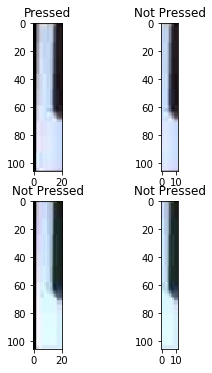

Samples from X_test: 


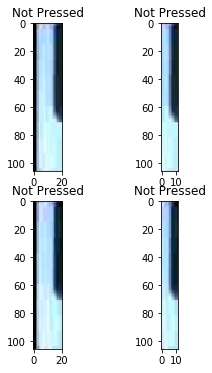

Samples from X_val: 


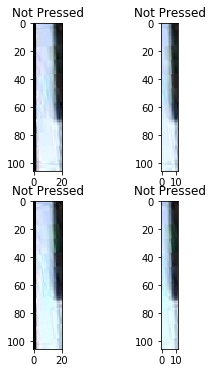

In [3]:
# print several images with labels

for _type in ['train', 'test', 'val']:

    print(f'Samples from X_{_type}: ')

    fig, axarr = plt.subplots(2, 2, figsize=[4, 6])

    for i in range(0, 2):
        imgw, imgb, notew, noteb = dataset.get_sample(_type, method=0)
        axarr[i, 0].imshow(imgw[0])
        axarr[i, 0].set_title(visualize_keys(notew[0]))
        axarr[i, 1].imshow(imgb[0])
        axarr[i, 1].set_title(visualize_keys(noteb[0]))

    plt.show()

In [4]:
bmodel.train(dataset, batch_size=32, num_epochs=20,
                     learning_rate=1e-3,
                     best_path='keypress_recognition/best_black_model.tar',
                     current_path='keypress_recognition/current_black.tar',
                     method=0, key_type='black')

Accuracy Matrix: both_0, pred_0_but_out_1, pred_1_but_out_0, both_1
Epoch 1/20


IntProgress(value=0, max=90089)

torch.Size([1152, 3, 106, 12])
torch.Size([32, 36])


/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([32, 36])) that is different to the input size (torch.Size([1152, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


KeyboardInterrupt: 

In [ ]:
wmodel.train(dataset, batch_size=32, num_epochs=20,
                     learning_rate=1e-3,
                     best_path='keypress_recognition/best_white_model.tar',
                     current_path='keypress_recognition/current_white.tar'
                     method=0, key_type='white')

In [ ]:
Xw, Xb, _, _ = dataset.get_sample('train', method=0)
fig, axarr = plt.subplots(1, 2, figsize=[16, 16])
axarr[0].imshow(Xw)
axarr[1].imshow(Xb)

Xw = np.transpose(Xw, [2, 0, 1])[None]
Xb = np.transpose(Xb, [2, 0, 1])[None]
yw = wmodel.evaluate(Xw)[0]
yb = bmodel.evaluate(Xb)[0]
axarr[0].set_title(visualize_keys(yw))
axarr[1].set_title(visualize_keys(yb))

plt.show()